In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pointpats
from tqdm.notebook import tqdm
os.chdir('/home/silva/Codes-Notebooks/PREDQC/')
from utils.spatial_tools import *
from utils.tools import *
%matplotlib inline

### Set directory

In [34]:
# set directory
os.chdir('/home/silva/Research/My project/PREDQC/')

In [35]:
# bounds north quebec
bounds = gpd.read_file('study_areas_polyg/east_quebec_churchill_bounds.shp')

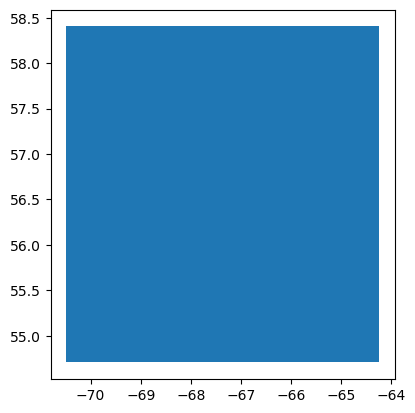

In [36]:
bounds.plot()
plt.show()

### Import dataset

### Dictionary Lithologies - SIGEOM

In [37]:
litho_dict = pd.read_csv('lithos.txt', sep=',')
litho_dict.head()

CODE                   ROCHE
0    A1                Paléosol
1  A2A4    Latérite nickelifère
2    A2  Régolite/paléorégolite
3  A2A3      Latérite ferrifère
4  A2A2    Latérite manganifère

### Affleurement compilation

In [38]:
# NAD83 - ESPG: 4269
crs = "+proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs"
affl_comp = gpd.read_file('GEOL_SIGEOM_QC/Affleurement compilation.shp', bbox=bounds.geometry)
affl_comp.to_crs(crs)
print(affl_comp.shape)
affl_comp.head(3)

(54931, 24)


NUMR_AFLR  FUS_UTM    ESTN     NORD CODE_PREC               LITH DESC_LITH  \
0     731297       19  563842  6141436         2  M1,BO,AM-M5,BO,AM      None   
1     731298       19  563672  6144211         2  M1,BO,AM-M5,BO,AM      None   
2     731299       19  563353  6143608         2  M1,BO,AM-M5,BO,AM      None   

  DESC_LIT_A PART_LITH  MINR  ...  COMN1 COMN2 COMN3 COMN4 NUMR_RAPR1  \
0       None      None  None  ...   None  None  None  None   MB 88-36   
1       None      None  None  ...   None  None  None  None   MB 88-36   
2       None      None  None  ...   None  None  None  None   MB 88-36   

  NUMR_RAPR2 NUMR_RAPR3 CODE_SYMBL   DATE_PREM                    geometry  
0       None       None        AFF  2015-11-24  POINT (-67.99152 55.41500)  
1       None       None        AFF  2014-09-17  POINT (-67.99358 55.43995)  
2       None       None        AFF  2015-11-24  POINT (-67.99875 55.43457)  

[3 rows x 24 columns]

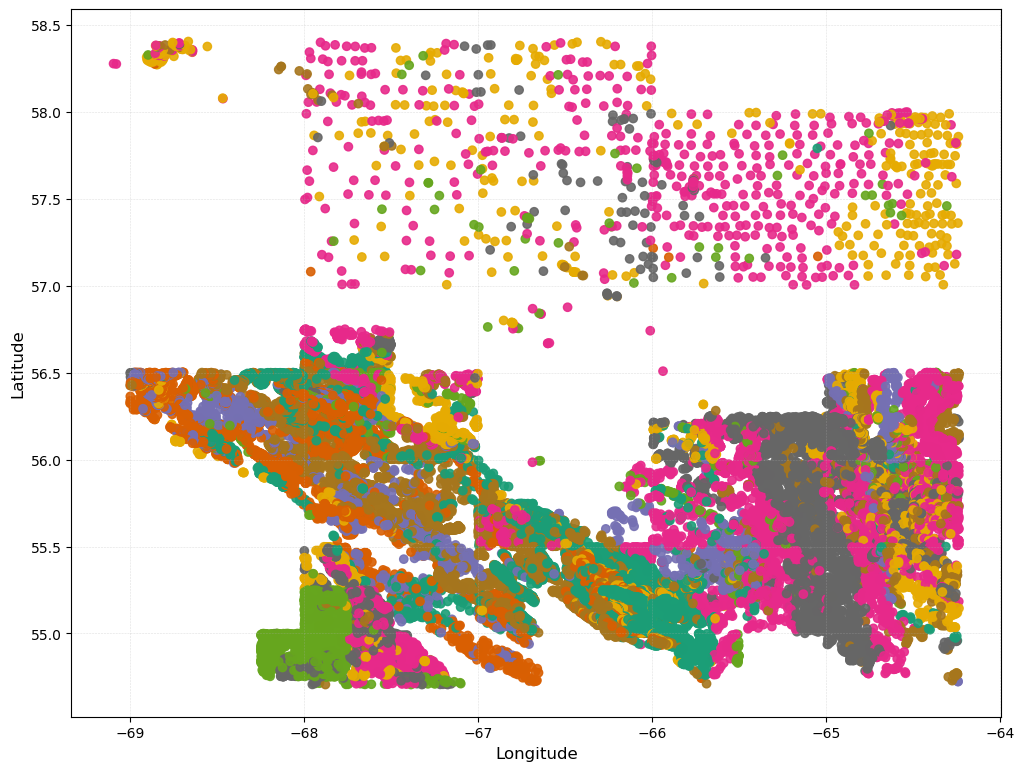

In [39]:
affl_comp.plot(column='LITH', figsize=(12, 12), aspect=1, alpha=0.9, cmap='Dark2_r', legend=False)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(linewidth=0.4, alpha=0.4, linestyle='--')

plt.show()

### Finding labels

In [40]:
priority = find_labels(affl_comp.LITH.values, litho_dict, 3)

  0%|          | 0/54931 [00:00<?, ?it/s]

In [41]:
ii = 1500
print(priority[ii], affl_comp.LITH[ii])

['I' 'I3' 'I3A'] I3A[MA]-I3K[MA]


### Geofiche

In [42]:
# NAD83 - ESPG: 4269
crs = "+proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs"
affl_geofiche = gpd.read_file('GEOL_SIGEOM_QC/Affleurement geofiche.shp', bbox=bounds.geometry)
affl_geofiche = affl_geofiche.iloc[np.where(affl_geofiche.CODE_ROCH1.values != None)[0]]
affl_geofiche.reset_index(drop=True, inplace=True)
affl_geofiche.to_crs(crs)
print(affl_geofiche.shape)
affl_geofiche.head()

(20603, 93)


NUMR_GEOFC  NUMR_GEOLG INTL_GEOLG DATE_OBSR CODE_MIL CODE_DIMN CODE_QUALT  \
0       10756          16         MS  19990615        B         5          R   
1       10757          17         MS  19990615        B         5          R   
2       10758          18         MS  19990615        B         4          P   
3       10759          19         MS  19990615        B         6          R   
4       10760          20         MS  19990618        B         4          P   

   FUS_UTM    ESTN     NORD  ... CODE_INCA4 CODE_COSA4  EPSR4 STRUTEXT4  \
0       19  434358  6245361  ...       None       None   None      None   
1       19  428683  6246065  ...       None       None   None      None   
2       19  426447  6242369  ...       None       None   None      None   
3       19  437195  6241209  ...       None       None   None      None   
4       19  430310  6241869  ...       None       None   None      None   

  CODE_DEFR4 REFR4 VALR_PROP4 CODE_SYMBL   DATE_PREM  \
0       None  None       None      GEOFI  2015-06-03   
1       None  None       None      GEOFI  2015-06-03   
2       None  None       None      GEOFI  2015-06-03   
3       None  None       None      GEOFI  2015-06-03   
4       None  None       None      GEOFI  2015-06-03   

                     geometry  
0  POINT (-70.06210 56.34838)  
1  POINT (-70.15409 56.35388)  
2  POINT (-70.18923 56.32034)  
3  POINT (-70.01521 56.31147)  
4  POINT (-70.12665 56.31643)  

[5 rows x 93 columns]

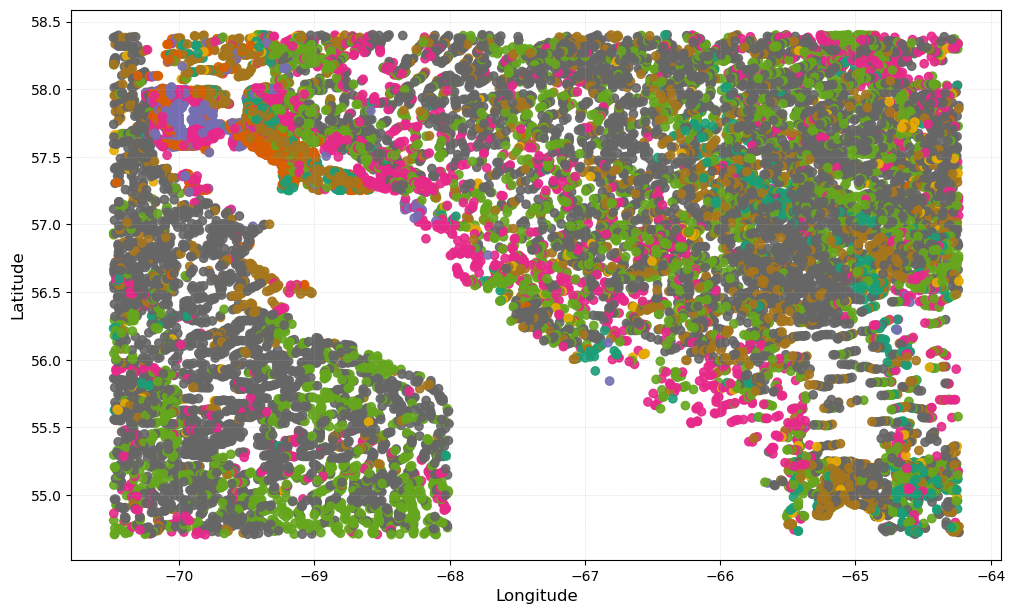

In [43]:
affl_geofiche.plot(column='CODE_ROCH1', figsize=(12, 12), aspect=1, alpha=0.9, cmap='Dark2_r')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(linewidth=0.4, alpha=0.4, linestyle='--')
plt.show()

In [44]:
priority1 = find_labels(affl_geofiche.CODE_ROCH1.values, litho_dict, 3)

  0%|          | 0/20603 [00:00<?, ?it/s]

In [45]:
affl_geofiche.CODE_ROCH1.values

array(['I1B', 'M4', 'V3B', ..., 'M4', 'I2I', 'M1'], dtype=object)

In [46]:
priority1

array([['I', 'I1', 'I1B'],
       ['M', 'M4', 'XXXX'],
       ['V', 'V3', 'V3B'],
       ...,
       ['M', 'M4', 'XXXX'],
       ['I', 'I2', 'I2I'],
       ['M', 'M1', 'XXXX']], dtype=object)

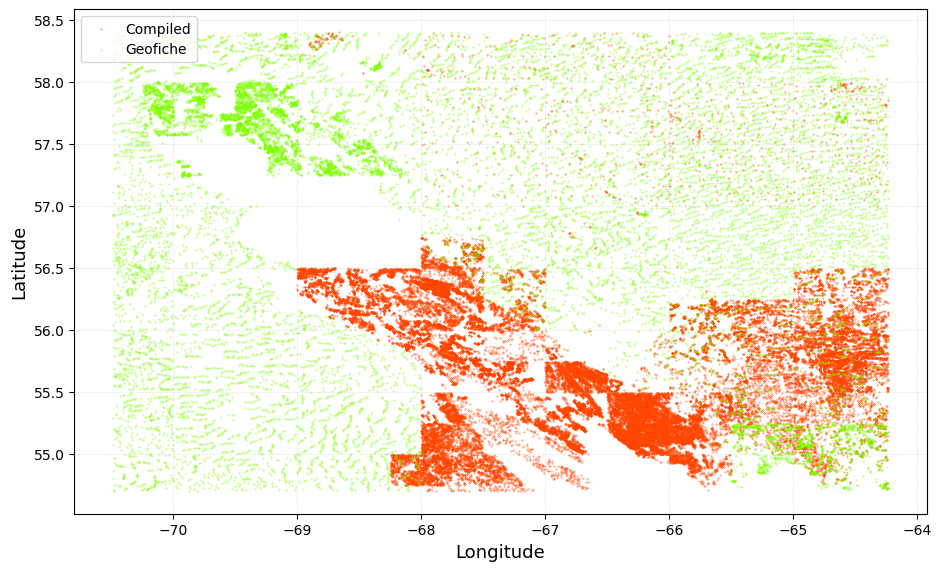

In [47]:
fig, ax = plt.subplots(figsize=(11, 10))
affl_comp.plot(ax=ax, markersize=0.1, color='orangered', alpha=0.8, label='Compiled', legend=True)
affl_geofiche.plot(ax=ax, markersize=0.1, color='chartreuse', alpha=0.8, label='Geofiche', legend=True)
ax.axis('scaled')
plt.legend()
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.grid(linewidth=0.4, alpha=0.4, linestyle='--')
plt.savefig(f'/home/silva/Codes-Notebooks/PREDQC/Spyder/plots/east_qc/preprocessing/outcrops_geofiche_compiled.png', dpi=400, bbox_inches='tight')
plt.show()

### Merging the datasets

In [48]:
# coordinates
lat0 = affl_comp.geometry.y
lon0 = affl_comp.geometry.x

lat1 = affl_geofiche.geometry.y
lon1 = affl_geofiche.geometry.x

# concat
lat = np.concatenate((lat0, lat1))
lon = np.concatenate((lon0, lon1))

In [49]:
# merging labels
code_r1 = np.concatenate((priority[:, 0], priority1[:, 0])) 
code_r2 = np.concatenate((priority[:, 1], priority1[:, 1])) 
code_r3 = np.concatenate((priority[:, 2], priority1[:, 2])) 
original_labels = np.concatenate((affl_comp.LITH.values, affl_geofiche.CODE_ROCH1.values))

In [50]:
new_c3 = []
for c2, c3 in zip(code_r2, code_r3):
    if (c3 == 'XXXX') and (c2 != 'XXXX'):
        new_c3.append(c2)
    else:
        new_c3.append(c3)    

In [51]:
data = {'lat':lat, 'lon':lon, 'code_r1':code_r1, 'code_r2':code_r2, 'code_r3':new_c3, 
        'labels':original_labels}

rock_samples = pd.DataFrame(data)
rock_samples = gpd.GeoDataFrame(rock_samples, geometry=gpd.points_from_xy(lon, lat), crs=crs)
print(rock_samples.shape)
rock_samples = rock_samples[rock_samples.code_r2 != 'M2']
rock_samples.reset_index(inplace=True, drop=True)
rock_samples.head()

(75534, 7)


lat        lon code_r1 code_r2 code_r3             labels  \
0  55.414997 -67.991524       M      M1      M1  M1,BO,AM-M5,BO,AM   
1  55.439951 -67.993575       M      M1      M1  M1,BO,AM-M5,BO,AM   
2  55.434574 -67.998754       M      M1      M1  M1,BO,AM-M5,BO,AM   
3  55.432251 -67.997090       M      M1      M1  M1,BO,AM-M5,BO,AM   
4  55.429652 -67.995765       M      M1      M1  M1,BO,AM-M5,BO,AM   

                     geometry  
0  POINT (-67.99152 55.41500)  
1  POINT (-67.99358 55.43995)  
2  POINT (-67.99875 55.43457)  
3  POINT (-67.99709 55.43225)  
4  POINT (-67.99577 55.42965)

### Subset

In [52]:
column = 'code_r3'
min_frequency = 0.1 #[%] onyl samples above this frequency are considered
index, codes, proportions, counts = subset_infos(rock_samples[rock_samples[column] != 'XXXX'], 
                                                 column, min_frequency)
print(counts.min())

73


In [53]:
labels = []
for n, sublabel in enumerate(codes):
    label = litho_dict[litho_dict.CODE ==  sublabel].ROCHE.values[0]
    labels.append(label)
    print(sublabel, '-', label, '-', counts[n], 'samples')
    
print(' ')
print('n_classes:', len(labels))

I1 - Roches intrusives felsiques - 558 samples
I1B - Granite - 5878 samples
I1C - Granodiorite - 2187 samples
I1D - Tonalite - 2159 samples
I1G - Pegmatite - 261 samples
I1M - Monzogranite - 197 samples
I1P - Granite à hypersthène (charnockite) - 1460 samples
I1S - Granodiorite à hypersthène (opdalite) - 205 samples
I1T - Tonalite à hypersthène (enderbite) - 240 samples
I2D - Syénite - 151 samples
I2E - Monzonite quartzifère - 401 samples
I2F - Monzonite - 100 samples
I2G - Monzodiorite quartzifère - 507 samples
I2I - Diorite quartzifère - 650 samples
I2J - Diorite - 566 samples
I2O - Monzonite à hypersthène (mangérite) - 183 samples
I2Q - Diorite à hypersthène - 118 samples
I3A - Gabbro - 13610 samples
I3Q - Gabbronorite - 117 samples
I4 - Roches intrusives ultramafiques/ultrabasiques - 92 samples
I4I - Péridotite - 1422 samples
M1 - Gneiss - 4020 samples
M10 - Paraschiste - 74 samples
M11 - Phyllade - 114 samples
M12 - Quartzite - 755 samples
M13 - Marbre (calcaire cristallin) - 85 s

### Regroup the rock types

In [54]:
def convert_code(code_array, original, target):
    for orig, tgt in zip(original, target):
        code_array = np.where(code_array == orig, tgt, code_array)
    return code_array

In [55]:
converted_codes = convert_code(rock_samples[column].values, 
                       'I1 I1C IEI I1S I2I I1T I1M I2O I1D I2G I2F I2E I2J I2O I4 M5 M6 M3 M4 V3B S9D S9C S9D S6A S6E S6F S6G S6K S6J M4 M5 M6 S1C S2C S1A V3F'.split(' '),
                       'I1B I1B I2 I2 I2 I1P I1D I1B I1B I2 I2 I2 I2 I2 I4I M1 M1 M1 M1 V3 S9 S9 S9 S6 S6 S6 S6 S6 S6 M1 M1 M1 S1 S1 S1 V3'.split(' '))

# add to dataframe
rock_samples[column] = converted_codes
min_frequency = 0.8 #[%] onyl samples above this frequency are considered
index, codes, proportions, counts = subset_infos(rock_samples[rock_samples[column] != 'XXXX'], 
                                                 column, min_frequency)
print(counts.min())

610


In [56]:
labels = []
for n, sublabel in enumerate(codes):
    label = litho_dict[litho_dict.CODE ==  sublabel].ROCHE.values[0]
    labels.append(label)
    print(sublabel, '-', label, counts[n])
print(' ')
print('n_classes:', len(labels))
    

I1B - Granite 11162
I1P - Granite à hypersthène (charnockite) 1700
I2 - Roches intrusives intermédiaires 2439
I3A - Gabbro 13610
I4I - Péridotite 1514
M1 - Gneiss 12249
M12 - Quartzite 755
M16 - Amphibolite 1656
M8 - Schiste 1607
S1 - Grès 2573
S3 - Wacke 1077
S4 - Conglomérat 610
S6 - Mudrock 3816
S8 - Dolomie 2141
S9 - Formation de fer 1183
V3 - Roches volcaniques mafiques 9337
 
n_classes: 16


In [65]:
rock_names = [
    "Granite",
    "Charnockite",
    "Diorite",
    "Gabbro",
    "Péridotite",
    "Gneiss",
    "Quartzite",
    "Amphibolite",
    "Schiste",
    "Grès",
    "Wacke",
    "Conglomérat",
    "Mudrock",
    "Dolomie",
    "Formation de fer",
    "Basalte"
]

In [66]:
english_rock_names = [
    "Granite",
    "Charnockite",
    "Diorite",
    "Gabbro",
    "Peridotite",
    "Gneiss",
    "Quartzite",
    "Amphibolite",
    "Schist",
    "Sandstone",
    "Wacke",
    "Conglomerate",
    "Mudrock",
    "Dolomite",
    "Iron Formation",
    "Mafic Volcanic Rocks"
]

In [67]:
len(labels), len(codes)

(16, 16)

In [68]:
lito_codes = codes + ['Wt']
cmap = cmap_from_labels(rock_names, '/home/silva/Codes-Notebooks/PREDQC/Spyder/data/colors_catalog/catlog.csv',
                        from_lang='fr', to_lang='en')

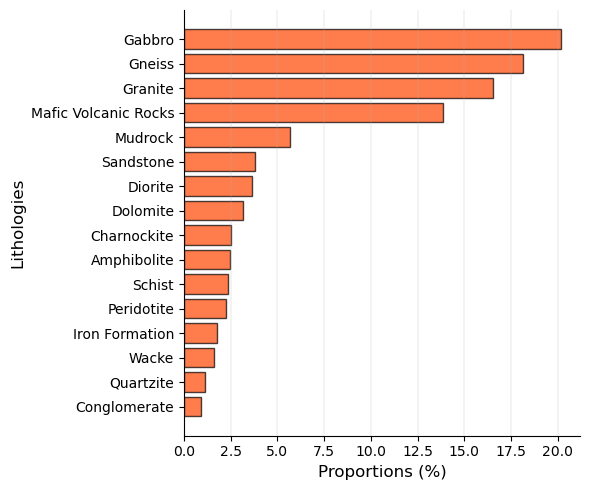

In [69]:
fig, ax1 = plt.subplots(figsize=(6, 5))

# Assuming you have 'proportions', 'labels', and 'rock_names' defined

sorted_idx = np.argsort(proportions)
labels = np.array(labels)

ax1.barh(labels[sorted_idx], proportions[sorted_idx] * 100., edgecolor='k', color='orangered', alpha=0.7)

ax1.set_xlabel('Proportions (%)', fontsize=12)
ax1.set_ylabel('Lithologies', fontsize=12)

# Set the y-axis ticks and labels
ax1.set_yticks(labels)
ax1.set_yticklabels(english_rock_names)

ax1.grid(linewidth=0.3, alpha=0.7, axis='x')  # Use 'x' instead of 'y' for horizontal gridlines

# Hide the right and top spines
ax1.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.savefig(f'/home/silva/Codes-Notebooks/PREDQC/Spyder/plots/east_qc/preprocessing/bar_lito_proportion_counts_{column}.png',
            dpi=300, bbox_inches='tight')
plt.show()

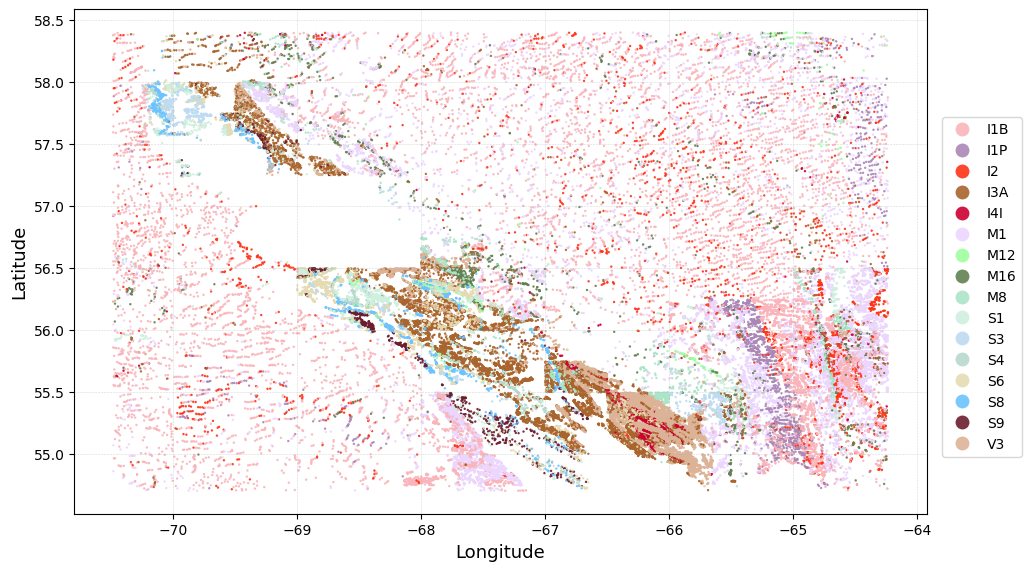

In [70]:
fig, ax = plt.subplots(figsize=(11, 10))
rock_samples.loc[index].plot(ax=ax, column=column, aspect=1, alpha=0.9, cmap=cmap, legend=True, markersize=0.5)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.92, 0., 0.2, .8))
plt.grid(linewidth=0.4, alpha=0.5, linestyle='--')
plt.axis('scaled')
plt.savefig(f'/home/silva/Codes-Notebooks/PREDQC/Spyder/plots/east_qc/preprocessing/field_samples_{column}_qc_east.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [71]:
coords = rock_samples[['lat', 'lon']].values
lat, lon = coords[:, 0], coords[:, 1]

In [72]:
lat, lon = rock_samples.lat.values, rock_samples.lon.values
#lat, lon = affl_comp.geometry.y.values, affl_comp.geometry.x.values
#lat, lon = affl_geofiche.geometry.y.values, affl_geofiche.geometry.x.values

### Point Pattern Analysis

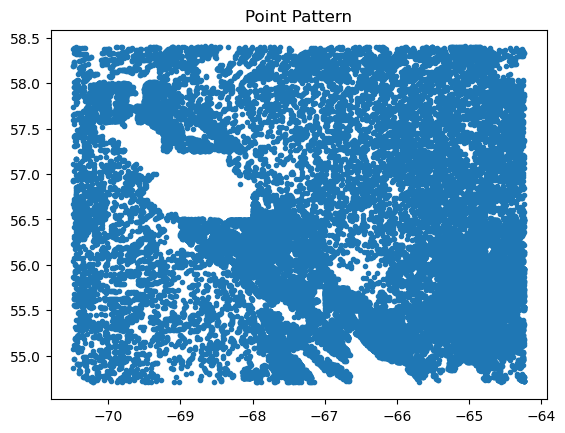

In [73]:
points = np.stack((lon, lat), axis=1)
pp = pointpats.PointPattern(points)
pp.plot()

1.200 km


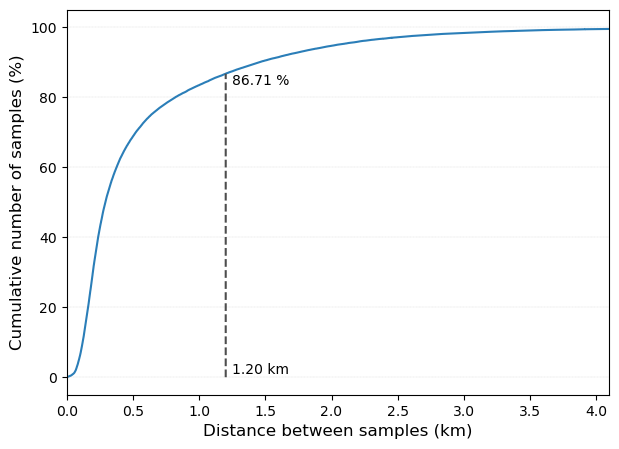

In [74]:
distances = np.sort(pp.nnd*111, axis=0) # distances [km]
perc = np.linspace(0, 100, distances.size)
# inflexion
dist = 1.2 # [km]
infl = np.where(distances >= dist)[0][0]
print(f'{distances[infl][0]:.3f} km')
step_degrees = distances[infl][0]/111

plt.figure(figsize=(7, 5), facecolor='w')
plt.plot(distances, perc, alpha=0.95)
plt.plot([distances[infl]]*len(perc[:infl]), perc[:infl], linestyle='--', color='.3')
plt.text(distances[infl]+0.05, 1, f'{distances[infl][0]:.2f} km')
plt.text(distances[infl]+0.05, perc[infl]-3., f'{perc[infl]:.2f} %')
plt.xlabel('Distance between samples (km)', fontsize=12)
plt.ylabel('Cumulative number of samples (%)', fontsize=12)
plt.xlim(0, 4.1)
plt.grid(linewidth=0.2, alpha=0.8, axis='y', linestyle='--')
plt.savefig('/home/silva/Codes-Notebooks/PREDQC/Spyder/plots/east_qc/preprocessing/cdf_samples.png',
            dpi=300, bbox_inches='tight')
plt.show()

In [75]:
minx, miny, maxx, maxy = (bounds.geometry.bounds.values[0][0],
                          bounds.geometry.bounds.values[0][1],
                          bounds.geometry.bounds.values[0][2],
                          bounds.geometry.bounds.values[0][3])

print(minx, miny, maxx, maxy)

-70.48529812895146 54.70625967986111 -64.23466825418726 58.403419712980345


### Create grid

In [76]:
ref_path = 'GEE/SENTINEL2/sentinel2_multispec_east_qc_100m.tif'
paths = ['GEE/SENTINEL2/sentinel2_multispec_east_qc_100m.tif']
#bands = ['ALOS', 'VV', 'VH', 'VV/VH', 'Blue', 'Green', 'Red', 'NIR', 'SWIR 1', 'SWIR 2']

In [77]:
scaling = 1/4
x, y, sat_grid = reinterp_xarrays(ref_path, paths, scaling=scaling, method='nearest')
print(sat_grid.shape)

(6, 1029, 1739)


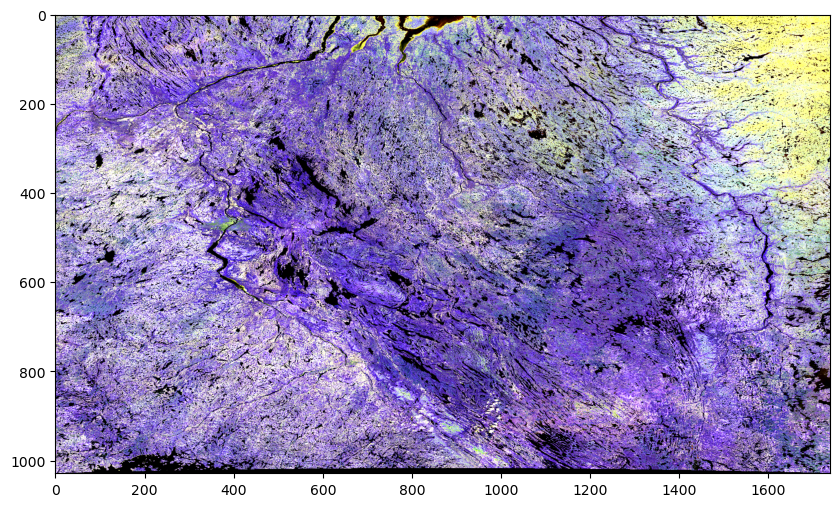

In [78]:
plt.figure(figsize=(10, 9))
plt.imshow(adjust_rgb(sat_grid[1:4].swapaxes(0, 1).swapaxes(1, 2), 10, 90))
plt.axis('scaled')
plt.show()

In [79]:
pixel_size = (100./scaling)/111e3
print(f'{(pixel_size*111000):.3f} meters')

400.000 meters


### Samples to grid

code_r3


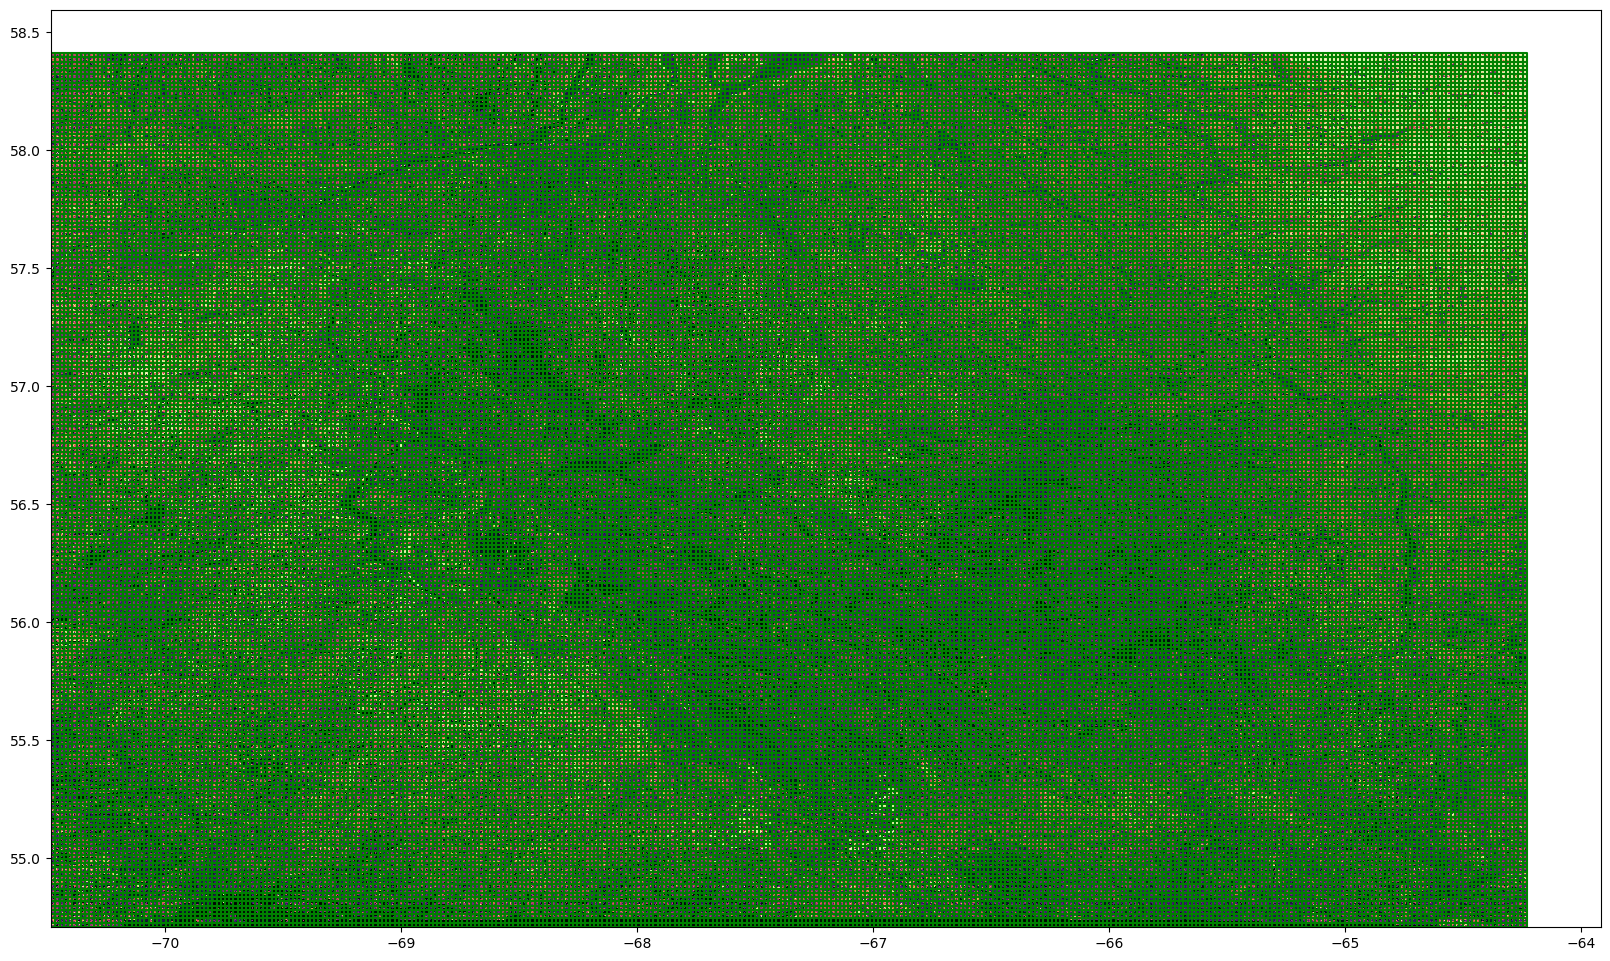

In [80]:
# create grid for block spatial split
fraction = 0.2
block_size = 5 # [pixels vs pixels]
spatial_blocks, _ = bounds2cells(rock_samples.loc[index], pixel_size, block_size, x, y, check_intersection=False)
print(column)

fig, ax = plt.subplots(figsize=(20, 20))
ax.pcolormesh(x, y, sat_grid[0], vmin=np.percentile(sat_grid[0], 2), 
              vmax=np.percentile(sat_grid[0], 98), cmap='magma')
spatial_blocks.boundary.plot(ax=ax, aspect=1, edgecolor='g')
plt.show()

In [81]:
spatial_blocks, train_blocks, val_blocks, train_index, val_index = stratified_spatial_split(spatial_blocks, 
                                                rock_samples, column, codes, fraction)

# training and validation dataframes
train_df = rock_samples.iloc[train_index].copy()
train_df.reset_index(drop=True, inplace=True)
val_df = rock_samples.iloc[val_index].copy()
val_df.reset_index(drop=True, inplace=True)

# ratio train/val
print('field samples')
print('-------------')
print(np.unique(train_df[column], return_counts=True)[1]/np.unique(val_df[column], 
                                                                   return_counts=True)[1])
# ratio train/val
print('spatial blocks')
print('-------------')
print(np.unique(train_blocks['labels'], return_counts=True)[1]/np.unique(val_blocks['labels'], 
                                                                         return_counts=True)[1])

field samples
-------------
[4.14118222 4.34722222 3.7617801  3.67233202 3.15533981 4.13722697
 3.26829268 4.77540107 3.70815451 4.28176796 3.73655914 4.01470588
 3.9406953  5.28518519 4.33939394 3.92742927]
spatial blocks
-------------
[4.         4.         4.00434783 4.00397614 4.02941176 4.00220994
 4.06896552 4.         4.01298701 4.01612903 4.02898551 4.08333333
 4.01626016 4.01190476 4.03389831 4.004     ]


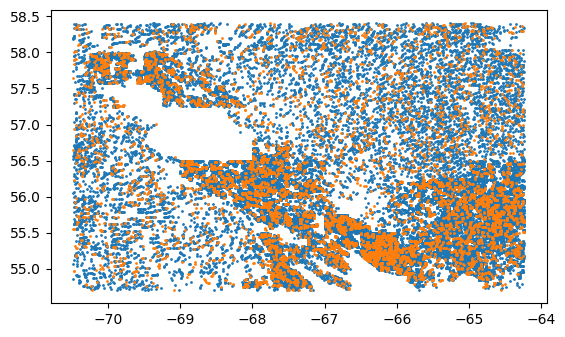

In [82]:
fig, ax = plt.subplots()
train_df.plot(ax=ax, markersize=1)
val_df.plot(ax=ax, markersize=1)
ax.axis('scaled')
plt.show()

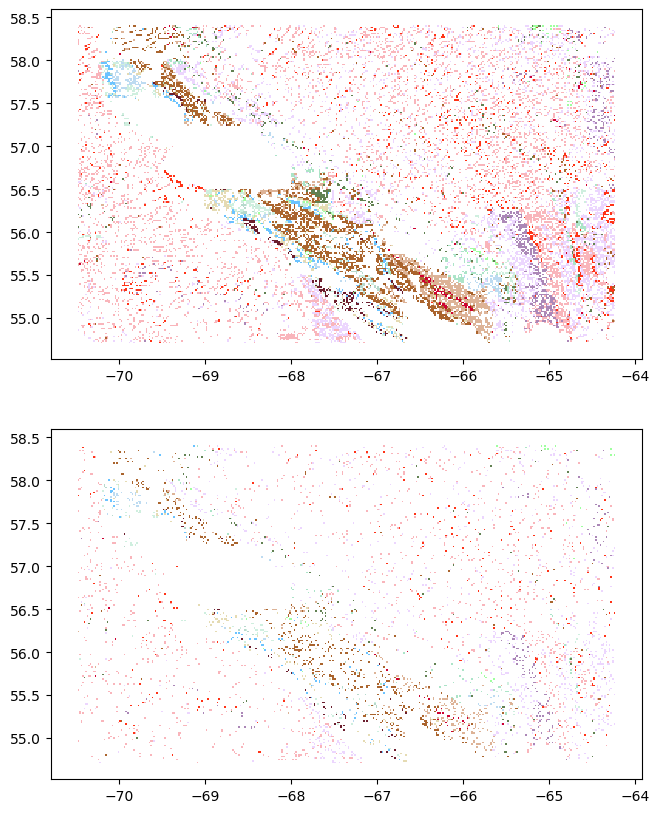

In [83]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
train_blocks[train_blocks.labels != 'XXXX'].plot(ax=ax[0], column='labels', aspect=1, cmap=cmap)
val_blocks[val_blocks.labels != 'XXXX'].plot(ax=ax[1], column='labels', aspect=1, cmap=cmap)
plt.show()

### Calculate lithologic probabilities

In [84]:
bs = 1
cells, (xc, yc) = bounds2cells(rock_samples, pixel_size, bs, x, y)

In [85]:
bf = pixel_size/2.0 # buffer on cells
prob_gdf = spatial_blocks_probability(cells, rock_samples.iloc[index], column, codes, bf)
prob_gdf = interp_column(prob_gdf, spatial_blocks, 'subset', crs)

/home/silva/Codes-Notebooks/PREDQC/Notebooks/spatial_tools.py:372: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  spatial_blocks['geometry'] = spatial_blocks.geometry.buffer(bf)
100%|█████████████████████████████████| 151429/151429 [02:02<00:00, 1238.22it/s]


/tmp/ipykernel_941803/3770967974.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(unique_values))


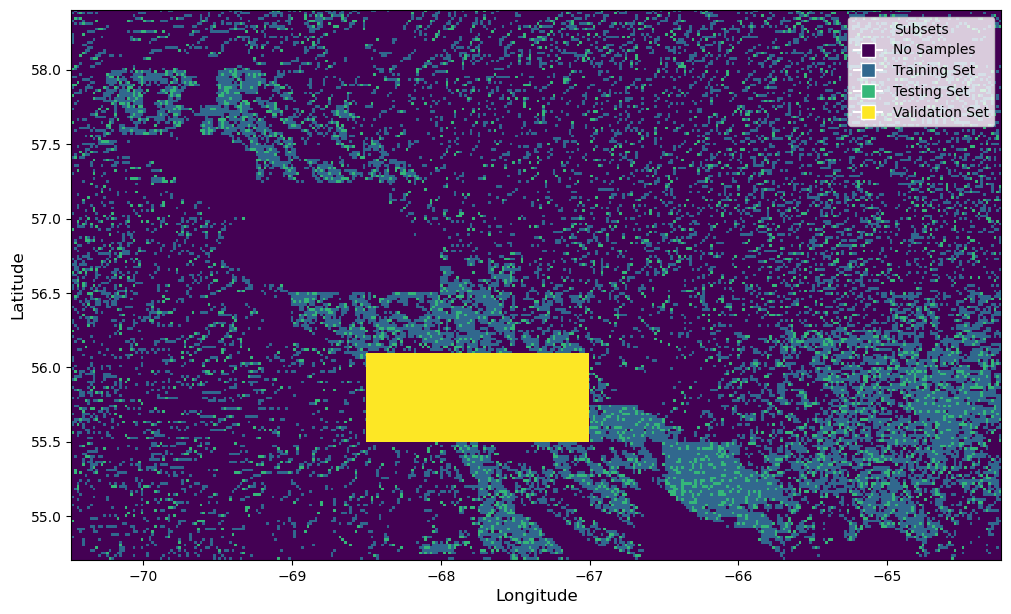

In [86]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# Define custom legend labels
legend_labels = ['No Samples', 'Training Set', 'Testing Set', 'Validation Set']

# Assuming prob_gdf['subset'] contains discrete values representing subsets
subsets_grid = prob_gdf['subset'].values.reshape(xc.shape).copy()

cond_x = (xc >-68.5) & (xc < -67.0)
cond_y = (yc > 55.5) & (yc < 56.1)
subsets_grid[cond_x & cond_y] = 3

# Get unique values in subsets_grid
unique_values = sorted(set(subsets_grid.flatten()))

# Create a ListedColormap with a color for each unique value
cmap = plt.cm.get_cmap('viridis', len(unique_values))

# Create a figure
plt.figure(figsize=(12, 12))

# Plot the data using the specified colormap
mesh = plt.pcolormesh(xc, yc, subsets_grid, cmap=cmap)
plt.axis('scaled')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Create custom legend
legend_elements = [Line2D([0], [0], marker='s', color='w', label=f'{legend_labels[i]}',
                          markerfacecolor=cmap(i), markersize=10) for i, val in enumerate(unique_values)]

# Add legend to the plot
plt.legend(handles=legend_elements, title='Subsets', loc='upper right')

plt.savefig(f'/home/silva/Codes-Notebooks/PREDQC/Spyder/plots/east_qc/preprocessing/subsets_qc_east.png', 
            dpi=300, bbox_inches='tight')
plt.show()

### Generate probability sparse masks

In [87]:
train_mask = np.expand_dims(np.where(subsets_grid == 1, 1.0, 0.0), -1)
test_mask = np.expand_dims(np.where(subsets_grid == 2, 1.0, 0.0), -1)
val_mask = np.expand_dims(np.where(subsets_grid == 3, 1.0, 0.0), -1)

# probability grid
cols = ['prob_' + code for code in codes]
prob_array = prob_gdf[cols].to_numpy().reshape((*xc.shape, len(codes)))
train_probs = prob_array * train_mask
test_probs = prob_array * test_mask
val_probs = prob_array * val_mask

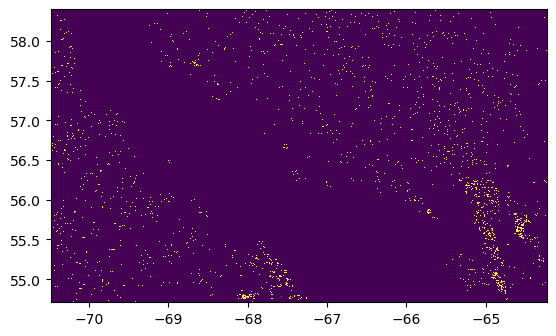

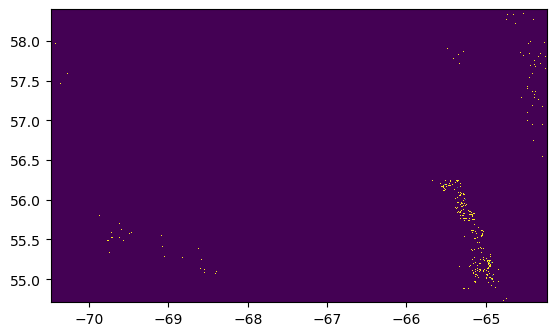

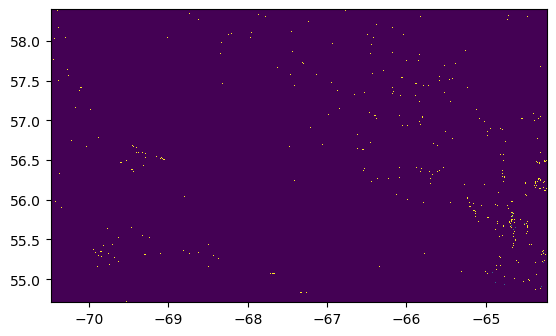

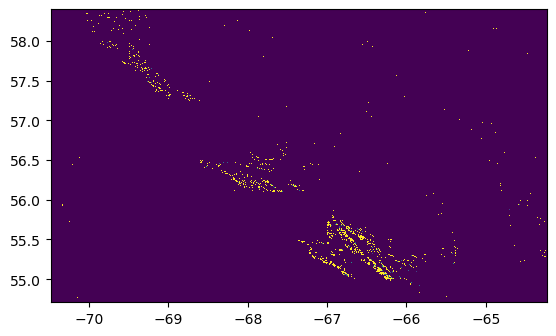

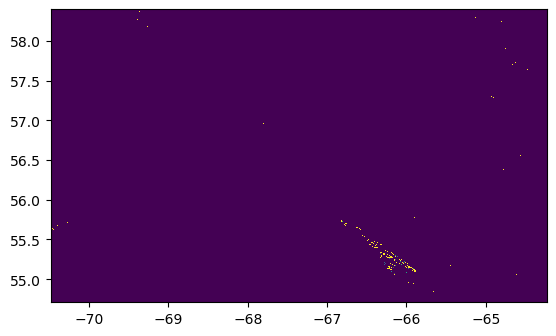

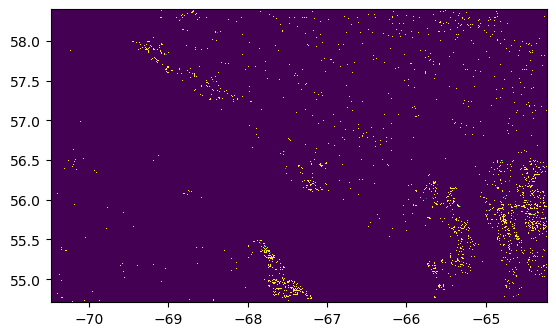

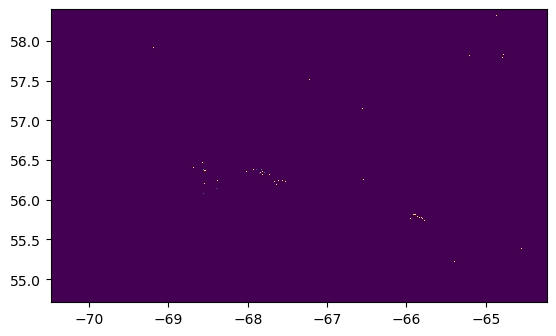

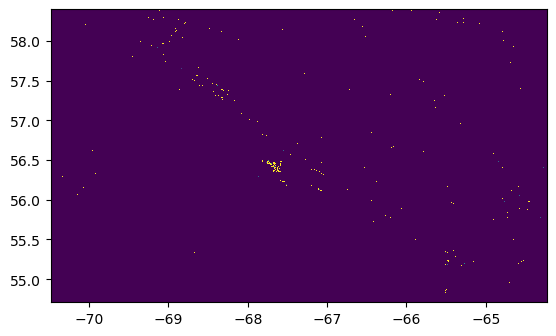

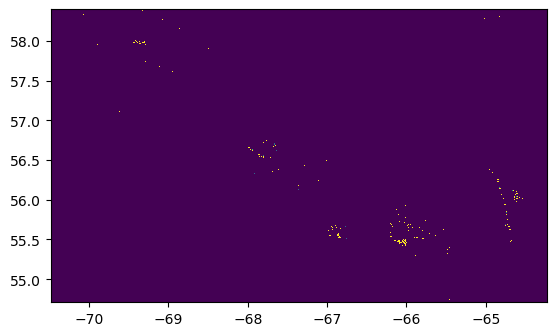

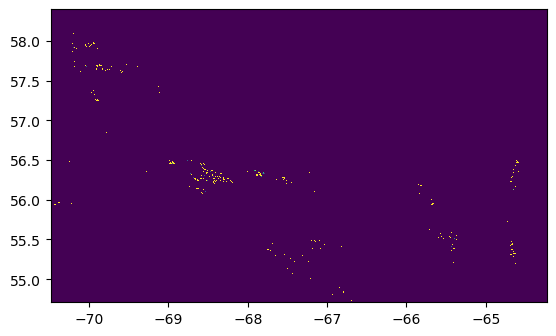

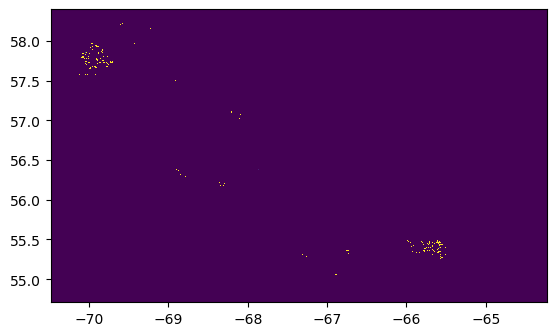

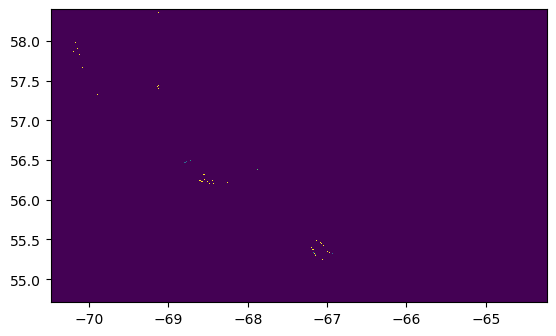

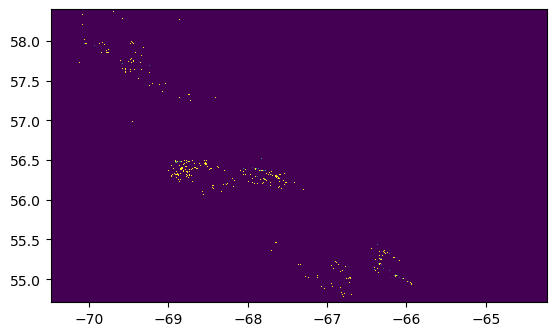

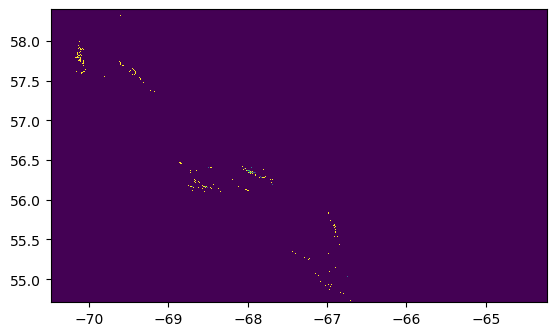

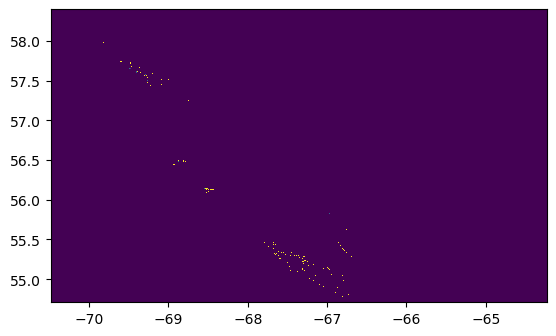

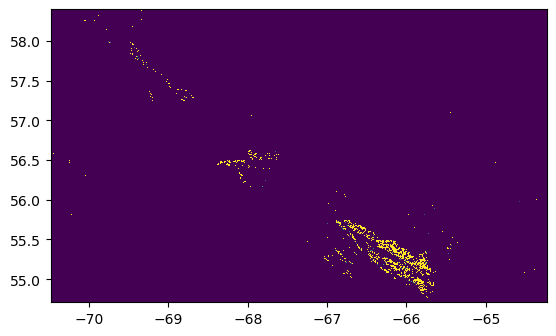

In [88]:
for n, code in enumerate(codes):
    plt.pcolormesh(xc, yc, train_probs[:, :, n], vmin=0.5)
    plt.axis('scaled')
    plt.show()

In [89]:
for n, code in enumerate(codes):
    print(np.where(train_probs[:, :, n] > 0.5, 
                   1.0, 0.0).sum()/np.where(test_probs[:, :, n] > 0.5, 
                                            1.0, 0.0).sum())

4.048272269491231
4.33976833976834
3.91768826619965
3.9265195040822496
4.447300771208226
3.9921090387374463
3.3366336633663365
4.287394957983193
4.249077490774908
3.934289127837515
3.773469387755102
4.860655737704918
3.5066921606118546
4.2736220472440944
3.9222520107238608
4.0475308641975305


In [100]:
from datetime import date
import xarray as xr
# get today's date
today = str(date.today()).replace('-', '_')

# variables
training_dict = {}
test_dict = {}
val_dict = {}

for n, lb in enumerate(codes):
    print(n, lb)
    training_dict[f'prob_{lb}'] = (['y', 'x'], train_probs[:, :, n], {'variable': f'{lb}'})
    test_dict[f'prob_{lb}'] = (['y', 'x'], test_probs[:, :, n], {'variable': f'{lb}'})
    val_dict[f'prob_{lb}'] = (['y', 'x'], val_probs[:, :, n], {'variable': f'{lb}'})

# coordinates
coords = {}
coords['lon'] = (["y", "x"], xc, {'crs': crs, 'EPSG':'4269'})
coords['lat'] = (["y", "x"], yc, {'crs': crs, 'EPSG':'4269'})

train_dset = xr.Dataset(training_dict, coords)
test_dset = xr.Dataset(test_dict, coords)
val_dset = xr.Dataset(val_dict, coords)

train_dset.to_netcdf(f'Datasets/prob_mask_train_east_qc_{len(codes)}_{int(100./scaling)}_{block_size}.nc')
test_dset.to_netcdf(f'Datasets/prob_mask_test_east_qc_{len(codes)}_{int(100./scaling)}_{block_size}.nc')
val_dset.to_netcdf(f'Datasets/prob_mask_val_east_qc_{len(codes)}_{int(100./scaling)}_{block_size}.nc')

0 I1B
1 I1P
2 I2
3 I3A
4 I4I
5 M1
6 M12
7 M16
8 M8
9 S1
10 S3
11 S4
12 S6
13 S8
14 S9
15 V3


In [84]:
export_tif(train_dset, crs, f'Datasets/prob_mask_train_east_qc_{len(codes)}_{int(100./scaling)}_{block_size}.tif')
export_tif(test_dset, crs, f'Datasets/prob_mask_test_east_qc_{len(codes)}_{int(100./scaling)}_{block_size}.tif')
export_tif(val_dset, crs, f'Datasets/prob_mask_val_east_qc_{len(codes)}_{int(100./scaling)}_{block_size}.tif')